In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
data = pd.read_csv("eurostat/eurostat-2013.csv")

In [87]:
data.iloc[0]

Nom                        Autriche
Code                             AT
tec00115 (2013)                 0.3
teilm (F dec 2013)              5.3
teilm (M dec 2013)              4.9
tec00118 (2013)                 2.1
teimf00118 (dec 2013)          2.17
tsdsc260(2013)                  4.1
tet00002 (2013)               -5683
tsc00001 (2011)                2.84
tsc00004 (2012)          0.00457142
Name: 0, dtype: object

In [4]:
data['tsc00004 (2012)'] = data['tsc00004 (2012)'].apply(lambda x: x/data.loc[lambda df: df['tsc00004 (2012)']==38637]["tps00001 (2013)"])

In [5]:
data =data.drop(['tps00001 (2013)'], axis=1)

In [72]:
data

,Nom,Code,tec00115 (2013),teilm (F dec 2013),teilm (M dec 2013),tec00118 (2013),teimf00118 (dec 2013),tsdsc260(2013),tet00002 (2013),tsc00001 (2011),tsc00004 (2012)
0,Autriche,AT,0.3,5.3,4.9,2.10,2.17,4.1,-5683,2.84,0.004571
1,Belgique,BE,0.2,8.1,8.8,1.20,2.43,3.9,14145,2.24,0.005212
2,Bulgarie,BG,0.9,11.8,13.7,0.40,3.43,6.6,-3610,0.64,0.001336
3,Suisse,CH,1.9,4.6,4.1,0.10,0.90,4.4,18780,2.87,0.002975
4,Chypre,CY,-5.4,15.5,17.5,0.40,6.00,4.9,-3229,0.46,0.000106
5,République tchèque,CZ,-0.9,8.0,5.6,1.40,2.20,3.4,13567,1.88,0.003924
6,Allemagne,DE,0.4,4.9,5.5,1.60,1.80,4.6,198613,2.98,0.041224
7,Danemark,DK,0.4,7.6,6.6,0.50,1.89,4.3,10121,2.98,0.004458
8,Zone euro,EA17,-0.4,12.0,11.7,1.40,2.97,5.0,157984,2.17,0.136060
9,Estonie,EE,2.2,7.9,8.7,3.20,0.00,5.5,-1401,2.18,0.000541


In [7]:
print(np.std(data))

tec00115 (2013)               1.993833
teilm (F dec 2013)            5.723112
teilm (M dec 2013)            5.012914
tec00118 (2013)               0.918168
teimf00118 (dec 2013)         1.757474
tsdsc260(2013)                1.868152
tet00002 (2013)          104616.124303
tsc00001 (2011)               0.928310
tsc00004 (2012)               0.048323
dtype: float64


In [8]:
standardscaler = preprocessing.StandardScaler()

In [162]:
X = data.iloc[:,2:11]
#y = (0.3-np.mean(data['tec00115 (2013)']))/np.std(data['tec00115 (2013)'][0])
Y= X.columns
Y


Index(['tec00115 (2013)', 'teilm (F dec 2013)', 'teilm (M dec 2013)',
       'tec00118 (2013)', 'teimf00118 (dec 2013)', 'tsdsc260(2013)',
       'tet00002 (2013)', 'tsc00001 (2011)', 'tsc00004 (2012)'],
      dtype='object')

In [109]:
X_norm = standardscaler.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
X_norm

array([[-5.47141528e-02, -8.88476119e-01, -1.09535264e+00,
         8.82521132e-01, -6.63659200e-01, -6.05038137e-01,
         1.61664632e-02,  1.10856364e+00, -3.91993061e-01],
       [-1.04868793e-01, -3.99231820e-01, -3.17362107e-01,
        -9.76911948e-02, -5.15719581e-01, -7.12095823e-01,
         2.05697476e-01,  4.62227950e-01, -3.78734682e-01],
       [ 2.46213688e-01,  2.47269575e-01,  6.60113182e-01,
        -9.68991041e-01,  5.32789537e-02,  7.33182943e-01,
         3.59817643e-02, -1.26133390e+00, -4.58938695e-01],
       [ 7.47760088e-01, -1.01078719e+00, -1.25494044e+00,
        -1.29572848e+00, -1.38628734e+00, -4.44451607e-01,
         2.50002310e-01,  1.14088043e+00, -4.25034950e-01],
       [-2.91352864e+00,  8.93770971e-01,  1.41815524e+00,
        -9.68991041e-01,  1.51560519e+00, -1.76807391e-01,
         3.96236503e-02, -1.45523461e+00, -4.84402618e-01],
       [-6.56569834e-01, -4.16704831e-01, -9.55713316e-01,
         1.20133767e-01, -6.46589244e-01, -9.797400

In [111]:
pca = PCA()

In [114]:
X_pca =pca.fit_transform(X_norm)
X_pca.shape

(33, 9)

In [122]:
Y.values.shape

(33, 1)

In [175]:

pca1_pca2 = pd.DataFrame(data=X_pca, columns = Y)

array([[-1.81475651e+00, -8.35743951e-01, -3.20884915e-01,
        -4.02621433e-01, -8.03157686e-01, -1.82440227e-01,
        -9.41816679e-02,  9.52421445e-02, -8.48770191e-02],
       [-6.49903956e-01, -8.34597636e-01, -3.27141582e-01,
         2.82067112e-01, -2.88048001e-01,  4.94872057e-02,
         2.40646352e-02, -2.34479748e-01,  8.12815622e-02],
       [ 1.12215079e+00,  4.32013572e-01,  8.27620626e-01,
         9.71401435e-01,  4.10260101e-01,  3.37946686e-01,
         6.66013033e-01,  1.31269796e-01,  1.48235491e-01],
       [-2.05621637e+00, -6.23232915e-01, -5.99505828e-01,
         1.85691298e+00, -6.06268785e-02,  1.85586199e-01,
        -6.55787700e-03, -1.27370868e-01, -1.42671836e-01],
       [ 3.58092506e+00, -3.51109222e-01, -8.04174918e-01,
        -1.32548507e-01, -6.68167570e-01, -9.44215753e-01,
         1.33272438e+00, -2.44701697e-01,  3.67742238e-01],
       [-7.66967564e-01, -1.15618867e+00, -3.50409054e-01,
         1.91861554e-02, -4.50605673e-01, -3.741131

,tec00115 (2013),teilm (F dec 2013),teilm (M dec 2013),tec00118 (2013),teimf00118 (dec 2013),tsdsc260(2013),tet00002 (2013),tsc00001 (2011),tsc00004 (2012),Code
0,-1.814757,-0.835744,-0.320885,-0.402621,-0.803158,-0.182440,-0.094182,0.095242,-0.084877,AT
1,-0.649904,-0.834598,-0.327142,0.282067,-0.288048,0.049487,0.024065,-0.234480,0.081282,BE
2,1.122151,0.432014,0.827621,0.971401,0.410260,0.337947,0.666013,0.131270,0.148235,BG
3,-2.056216,-0.623233,-0.599506,1.856913,-0.060627,0.185586,-0.006558,-0.127371,-0.142672,CH
4,3.580925,-0.351109,-0.804175,-0.132549,-0.668168,-0.944216,1.332724,-0.244702,0.367742,CY
5,-0.766968,-1.156189,-0.350409,0.019186,-0.450606,-0.374113,0.596284,-0.468521,-0.392707,CZ
6,-1.817411,-1.416510,-1.124164,-0.106079,0.887592,-0.120511,0.051818,1.034534,0.011092,DE
7,-1.189865,-0.632327,-0.972175,1.112661,-0.439550,0.116899,-0.154092,-0.046268,-0.108105,DK
8,-0.054311,-0.028585,-1.650829,-0.986648,2.171456,-0.097540,-0.083593,0.154175,-0.000295,EA17
9,-2.068041,-0.497246,0.839464,-1.224280,-0.286427,1.571025,0.296708,0.265310,-0.116985,EE


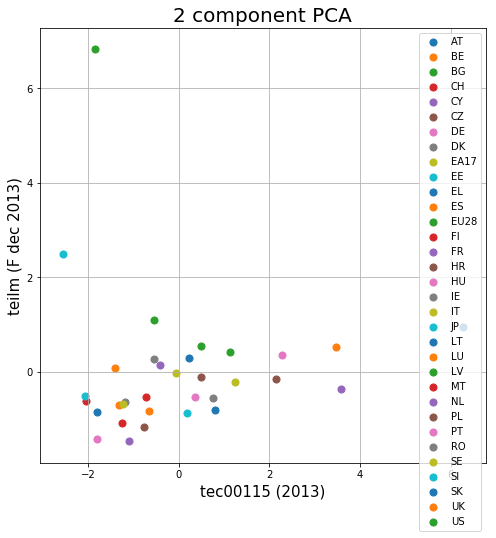

In [193]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
finalDf = pd.concat([pca1_pca2, data[['Code']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tec00115 (2013)', fontsize = 15)
ax.set_ylabel('teilm (F dec 2013)', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['Code'].values
colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tec00115 (2013)']
               , finalDf.loc[indicesToKeep, 'teilm (F dec 2013)']
               , cmap = cmap
               , s = 50)
ax.legend(targets)
ax.grid()
finalDf